In [3]:
import os
os.chdir('/Users/albert/ndreg')

In [4]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [5]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from ndreg import *

In [6]:
myImg = imgDownload("checkerBig")

In [7]:
type(myImg)

SimpleITK.SimpleITK.Image

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


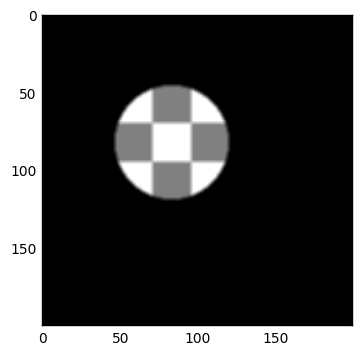

In [8]:
plt.imshow(sitk.GetArrayFromImage(myImg), cmap=plt.cm.gray)
plt.show()

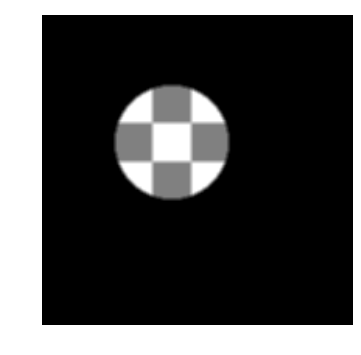

In [9]:
imgShow(myImg)

In [10]:
%matplotlib inline

In [11]:
inImg = imgDownload("checkerBig")
refImg = imgDownload("checkerSmall")

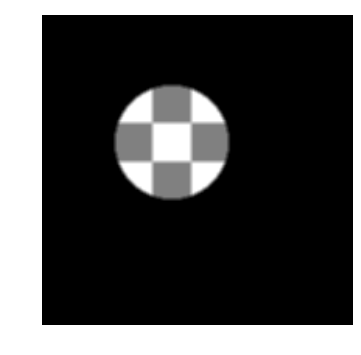

In [12]:
imgShow(inImg)

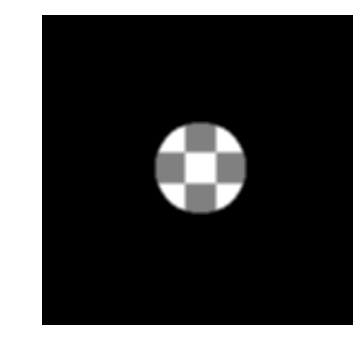

In [13]:
imgShow(refImg)

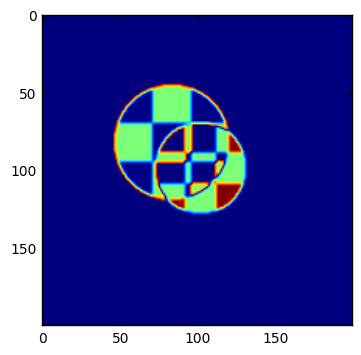

In [14]:
plt.imshow(sitk.GetArrayFromImage(refImg - inImg))

In [15]:
affine = imgAffine(inImg, refImg)
print(affine)

[1.3698699228263693, -0.014549856768631108, -0.011269730636309839, 1.3716329255377866, -0.284440040054589, -0.2720956369497831]


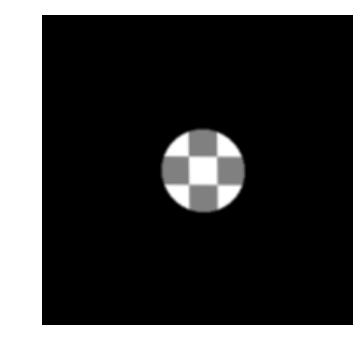

In [16]:
defInImg = imgApplyAffine(inImg, affine, size=refImg.GetSize())
imgShow(defInImg)

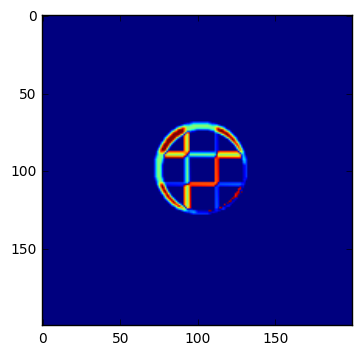

In [17]:
plt.imshow(sitk.GetArrayFromImage(refImg - defInImg))

In [18]:
(field, invField) = imgMetamorphosis(inImg, refImg, iterations=100, verbose=True)

	E, E_velocity, E_rate, E_image (E_image %), LearningRate
0.	1036.05, 0.0357762, 0, 1036.01 (65.6301%), 8.593750e-06
1.	913.975, 0.0218348, 0, 913.953 (57.8979%), 9.453125e-06
2.	687.782, 0.0368255, 0, 687.746 (43.5679%), 1.039844e-05
3.	552.372, 0.0302024, 0, 552.342 (34.9902%), 2.859570e-06
4.	243.257, 0.0278379, 0, 243.229 (15.4083%), 3.145527e-06
5.	191.272, 0.0256142, 0, 191.246 (12.1152%), 8.650200e-07
6.	180.405, 0.0249982, 0, 180.38 (11.4268%), 9.515220e-07
7.	134.176, 0.0242637, 0, 134.152 (8.49835%), 5.233371e-07
8.	122.74, 0.0237509, 0, 122.717 (7.77396%), 5.756708e-07
9.	116.753, 0.0233563, 0, 116.73 (7.39471%), 6.332379e-07
10.	113.098, 0.023124, 0, 113.074 (7.16314%), 6.965617e-07
11.	111.144, 0.0228728, 0, 111.121 (7.03939%), 7.662179e-07
12.	105.353, 0.0227959, 0, 105.33 (6.67253%), 4.214198e-07
13.	102.511, 0.0226658, 0, 102.488 (6.49252%), 4.635618e-07
14.	99.4064, 0.0225444, 0, 99.3839 (6.29585%), 5.099180e-07
15.	96.242, 0.0224119, 0, 96.2195 (6.0954%), 5.609098e-07

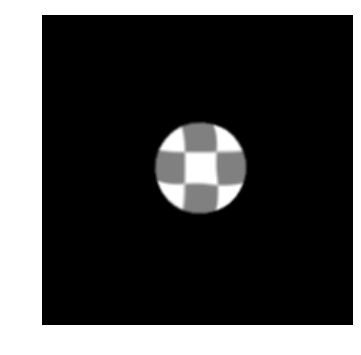

In [19]:
defInImg = imgApplyField(inImg, field, size=refImg.GetSize())
imgShow(defInImg)

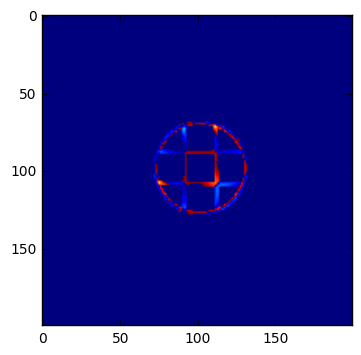

In [20]:
plt.imshow(sitk.GetArrayFromImage(refImg - defInImg))